In [1]:
import numpy as np
import cv2 as cv
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Implementar un extractor de características LBP básico

def lbp(img_path):
    """
    Esta funcion implementa un extractor LBP para imágenes.
    Se comienza por el píxel a la derecha del píxel central y se recorre en sentido antihorario.
    
    :param imagen: el path de la imagen para la cual que hay que obtener los LBP.
    :return: el código LBP de la imagen.
    """
    
    # Pasamos la imagen a escala de grises
    img = cv.imread(img_path, 0)
    
    # Recorremos la imagen y obtenemos el LBP para cada pixel
    # TODO la implementación actual desecha los píxeles más externos de la imagen. Pensar alternativas
    lbp_img = np.empty((img.shape[0] - 2, img.shape[1] - 2))
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            # Definimos el array de los pixeles vecinos
            coords = (
                [i, i - 1, i - 1, i - 1, i, i + 1, i + 1, i + 1],
                [j + 1, j + 1, j, j - 1, j - 1, j - 1, j, j + 1],
            )
            
            # Calculo el LBP y lo inserto en la coordenada deseada
            lbp_img[i - 1, j - 1] = np.packbits(img[coords] >= img[i, j])
    
    # Retornar la imagen lbp
    return lbp_img
            

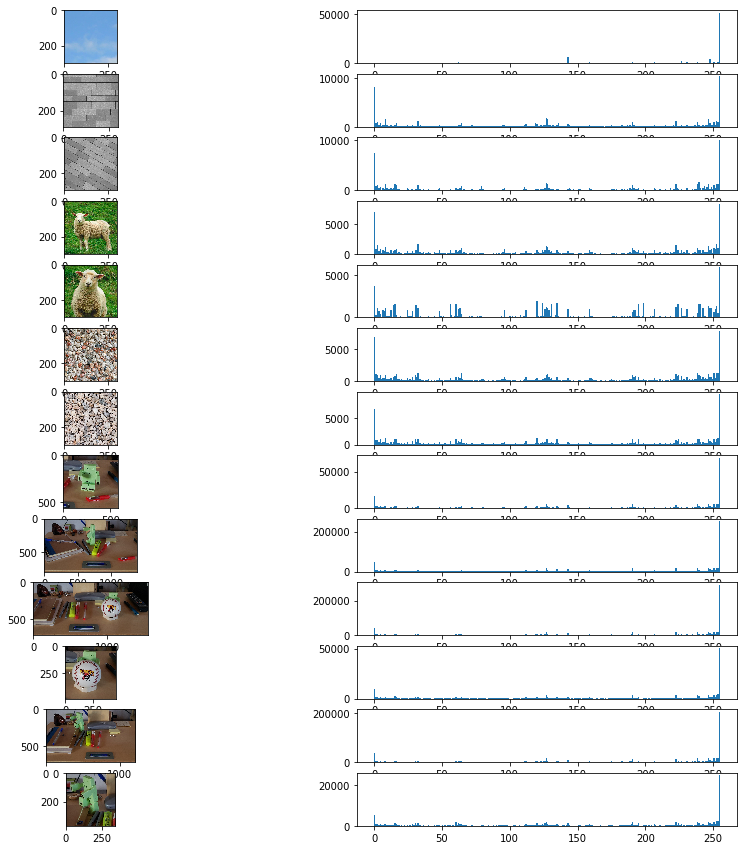

In [3]:
# Definimos los paths a las imagenes
img_paths = [
    'cielo.png',
    'ladrillos1.png',
    'ladrillos2.png',
    'oveja1.png',
    'oveja2.png',
    'piedras1.png',
    'piedras2.png',
    'rbt_scn1_focus.png',
    'rbt_scn2.png',
    'rbt_scn3.png',
    'rbt_scn3_focus.png',
    'rbt_scn4.png',
    'rbt_scn4_focus.png',
]

# Ploteamos las imágenes originales junto con sus histogramas
plt.figure(0, figsize=(15, 15))
for i, img_path in enumerate(img_paths):
    # Ploteamos la imagen original
    ax = plt.subplot2grid((len(img_paths), 2), (i, 0))
    ax.imshow(plt.imread(img_path))

    # Ploteamos el histograma
    ax = plt.subplot2grid((len(img_paths), 2), (i, 1))
    ax.hist(lbp(img_path).flatten(), bins=256)
plt.show()

In [4]:
# Calculamos las distancias euclídeas entre los histogramas de cada imagen,
# de modo de tener una noción entre sus similitudes

# Calculamos todos los histogramas y los guardamos como numpy arrays
# TODO sería más inteligente calcularlos sólo una vez
histogramas = np.empty((256, len(img_paths)))
for i, img_path in enumerate(img_paths):
    # Divido el histograma por la cantidad de pixeles, de modo de normalizar
    flatten_lbp = lbp(img_path).flatten()
    histogramas[:, i] = np.histogram(flatten_lbp, bins=256, range=(0, 256))[0] / len(flatten_lbp)


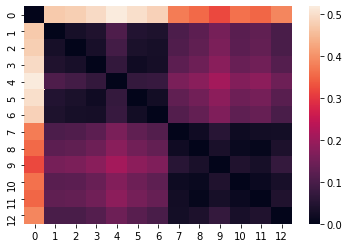

In [5]:
# Hacemos una matriz con las distancias euclídeas entre los histogramas
distances = np.zeros((len(img_paths), len(img_paths)))
for i in range(len(img_paths)):
    for j in range(i + 1, len(img_paths)):
        distance = np.sqrt(np.sum((histogramas[:, i] - histogramas[:, j]) ** 2))
        distances[i, j] = distance
        distances[j, i] = distance
        
ax = sns.heatmap(distances)

## Conclusiones

Las menores distancias se dan en dos grupos principalmente:

- imágenes 1-6 (imágenes pequeñas, con ladrillos, ovejas y piedras)
- imágenes 7-12 (imágenes más grandes, con un escritorio de fondo)

A partir de esto, la conclusión que puedo sacar por el momento es que el algoritmo es más sensible al tamaño de a imagen
que al contenido de la misma. Y esto aún después de normalizar los histogramas, dividiendo sus valores por la cantidad
total de píxeles de la imagen original.

Una cosa que sí es positiva es que en general las imágenes se diferencian mucho de la imagen del cielo.
